## House Sales in King County, USA



#### Content

1. [Introduction](#Introduction)<br>
2. [Load Packages](#Load_Packages)<br>
    A. [Import](#Import)<br>
    B. [Setup](#Setup)<br>
    C. [Version](#Version)<br>
3. [Problem Definition](Problem_Definition)<br>
    A. [Variables](Variables)<br>
4. [Exploratory Data Analysis(EDA)](#Exploratory_Data_Analysis(EDA))<br>
    A. [Data Collection](#Data_Collection)<br>
    B. [Data Visualization](#Data_Visualization)<br>    
6. [Model developement](#Model_developement)<br>
    A. [LinearRegression](#LinearRegression)<br>
    B. [XGBREgressor](#XGBREgressor)<br>   
7. [References](#References)<br>

#### 1. Introduction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#### 2. Load Packages

##### A. Import

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as st
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE
import sklearn
import sys


##### B. Setup 

In [99]:
%matplotlib inline
%precision 4
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

##### C. Version

In [100]:
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Python: {}'.format(sys.version))

Pandas: 1.0.3
Numpy: 1.17.0
Sklearn: 0.22.1
Python: 3.7.3 | packaged by conda-forge | (default, Mar 27 2019, 23:18:50) [MSC v.1900 64 bit (AMD64)]


#### 3. Problem Definition

In this project, we are going to predict the house prices using various regression models. 

##### A. Variables 

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#### 4. Exploratory Data Analysis (EDA)

##### A. Data Collection

In [101]:
# import the training dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.511200000000002,-122.257000000000005,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319000000000003,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.737900000000003,-122.232999999999990,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.520800000000001,-122.392999999999986,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.616799999999998,-122.045000000000002,1800,7503


In [102]:
df.shape

(21613, 21)

df.shape indicates that the number of rows in the dataset is 21613 and the column number is 21.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The type of our columns are either float64 or int64 except for one column which is 'date' and the type is object. 

In [104]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [105]:
#checking for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Luckily there are no missing values in our dataset.

In [106]:
# describe numerical values
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300000000000e+04,2.161300000000000e+04,21613.000000000000000,21613.000000000000000,21613.000000000000000,2.161300000000000e+04,21613.000000000000000,21613.000000000000000,21613.000000000000000,21613.000000000000000,21613.000000000000000,21613.000000000000000,21613.000000000000000,21613.000000000000000,21613.000000000000000,21613.000000000000000,21613.000000000000000,21613.000000000000000,21613.000000000000000,21613.000000000000000
mean,4.580301520864988e+09,5.400881417665294e+05,3.370841623097210,2.114757321982141,2079.899736269837376,1.510696756581687e+04,1.494308980706057,0.007541757275714,0.234303428492111,3.409429510017119,7.656873178179799,1788.390690787951598,291.509045481885892,1971.005135797899356,84.402257900337759,98077.939804747147718,47.560052519317040,-122.213896404940826,1986.552491556007908,12768.455651691112507
std,2.876565571312049e+09,3.671271964826997e+05,0.930061831147463,0.770163157217729,918.440897046811529,4.142051151513528e+04,0.539988895142382,0.086517197727903,0.766317569273640,0.650743046366266,1.175458756974304,828.090977651915068,442.575042677444060,29.373410802390172,401.679240019078293,53.505026257473695,0.138563710241925,0.140828342381392,685.391304252776990,27304.179631338574836
min,1.000102000000000e+06,7.500000000000000e+04,0.000000000000000,0.000000000000000,290.000000000000000,5.200000000000000e+02,1.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,290.000000000000000,0.000000000000000,1900.000000000000000,0.000000000000000,98001.000000000000000,47.155900000000003,-122.518999999999991,399.000000000000000,651.000000000000000
25%,2.123049194000000e+09,3.219500000000000e+05,3.000000000000000,1.750000000000000,1427.000000000000000,5.040000000000000e+03,1.000000000000000,0.000000000000000,0.000000000000000,3.000000000000000,7.000000000000000,1190.000000000000000,0.000000000000000,1951.000000000000000,0.000000000000000,98033.000000000000000,47.471000000000004,-122.327999999999989,1490.000000000000000,5100.000000000000000
50%,3.904930410000000e+09,4.500000000000000e+05,3.000000000000000,2.250000000000000,1910.000000000000000,7.618000000000000e+03,1.500000000000000,0.000000000000000,0.000000000000000,3.000000000000000,7.000000000000000,1560.000000000000000,0.000000000000000,1975.000000000000000,0.000000000000000,98065.000000000000000,47.571800000000003,-122.230000000000004,1840.000000000000000,7620.000000000000000
75%,7.308900445000000e+09,6.450000000000000e+05,4.000000000000000,2.500000000000000,2550.000000000000000,1.068800000000000e+04,2.000000000000000,0.000000000000000,0.000000000000000,4.000000000000000,8.000000000000000,2210.000000000000000,560.000000000000000,1997.000000000000000,0.000000000000000,98118.000000000000000,47.678000000000004,-122.125000000000000,2360.000000000000000,10083.000000000000000
max,9.900000190000000e+09,7.700000000000000e+06,33.000000000000000,8.000000000000000,13540.000000000000000,1.651359000000000e+06,3.500000000000000,1.000000000000000,4.000000000000000,5.000000000000000,13.000000000000000,9410.000000000000000,4820.000000000000000,2015.000000000000000,2015.000000000000000,98199.000000000000000,47.777600000000000,-121.314999999999998,6210.000000000000000,871200.000000000000000


The describe method for numerical data provide information which include count, mean, std(standars deviation), min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.



In [107]:
df.describe(include='object')

,date
count,21613
unique,372
top,20140623T000000
freq,142


##### B. Data Visualization

In this section we will visualize our dataset to get most information out of it. The first thing to notice is that our dataset contains **Quantitative Features** which deals with numbers and things you can measure objectively. There are two types of quantitative data also known as numerical data: discrete and continuous. The general concept is, counts are discrete and measurements are continuous. I will start by **Univariate Visualization** and then moving forward I will use **Multivariate Visualization**. 

##### B.1. Univariate Visualization

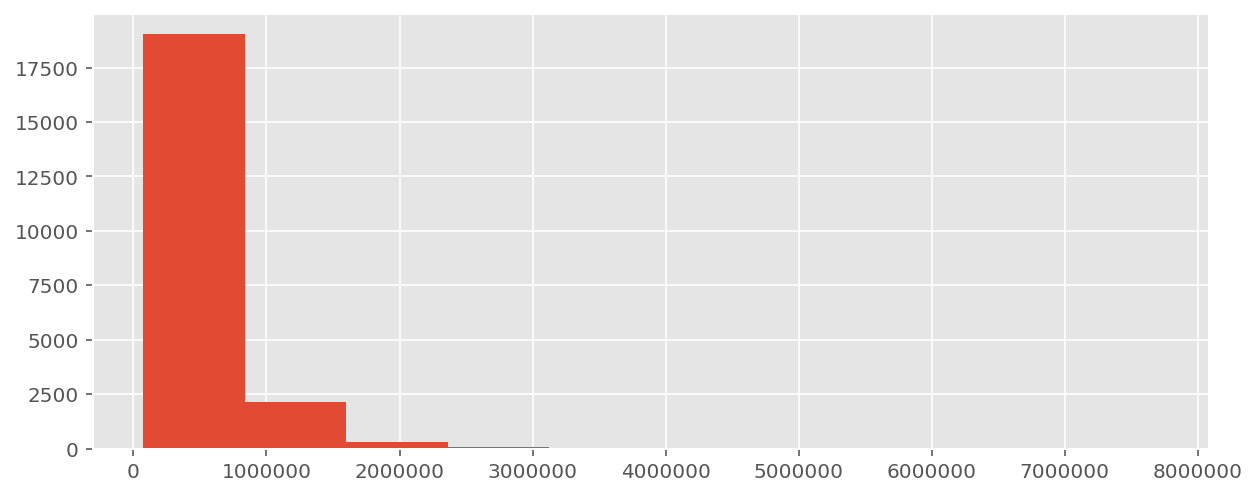

In [108]:
# knowing the target, 'price' variable
df['price'].hist(figsize=(10,4));

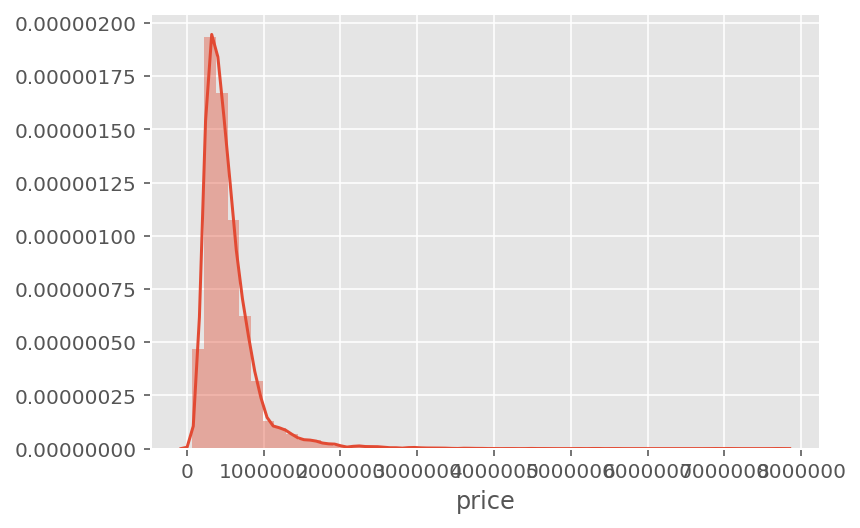

In [109]:
sns.distplot(df['price']);

Our target variable, as shown in the histogram plot and density plot, is not normally distributed and has a long tail to the right and shows **Positive Skewness**.

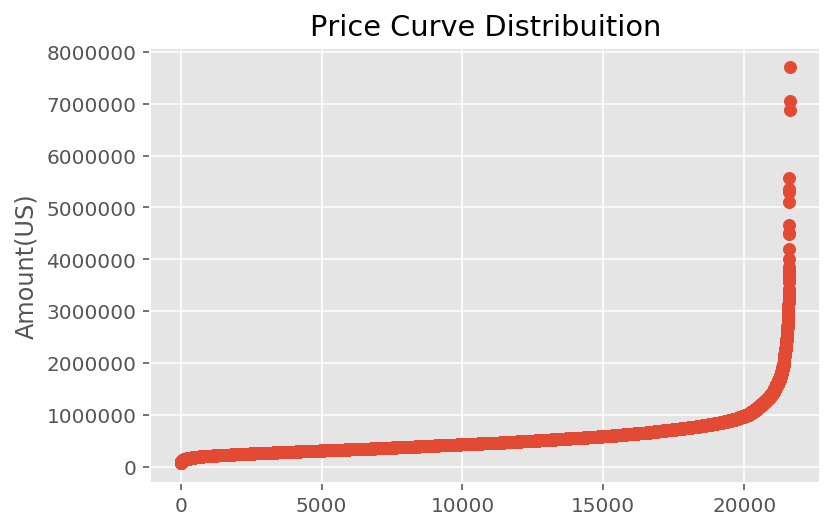

In [110]:
plt.scatter(range(df.shape[0]), np.sort(df['price'].values))
plt.title('Price Curve Distribuition')
plt.ylabel('Amount(US)');

From the above scatter plot we can see that out of about 21k of houses, about 20k of house prices are below 1M(US) and we also have some outlier prices ranging from 7M(US) to 8M(US).

In [111]:
df['price'].describe()

count    2.161300000000000e+04
mean     5.400881417665294e+05
std      3.671271964826997e+05
min      7.500000000000000e+04
25%      3.219500000000000e+05
50%      4.500000000000000e+05
75%      6.450000000000000e+05
max      7.700000000000000e+06
Name: price, dtype: float64

From the describe method we can understand that the minimum house price is 75,000 and the maximum house price is 7,700,000 and the median of house prices which is 50% percentile is 450,000. 

##### B.2. Multivariate Visualization

Multivariate plots allow us to see relationships between two and more different variables, all in one figure. We'll discuss **Quantitative vs. Quantitative** features, first, and then discuss **Quantitative versus Qualitative** features.

#### Quantitative vs. Quantitative Features

As you know, our target feature 'Price' is quantitative discrete data. So here we will visualize price feature along with other quantitative features to understand the effect of price on other quantitative features.

<Figure size 432x432 with 0 Axes>

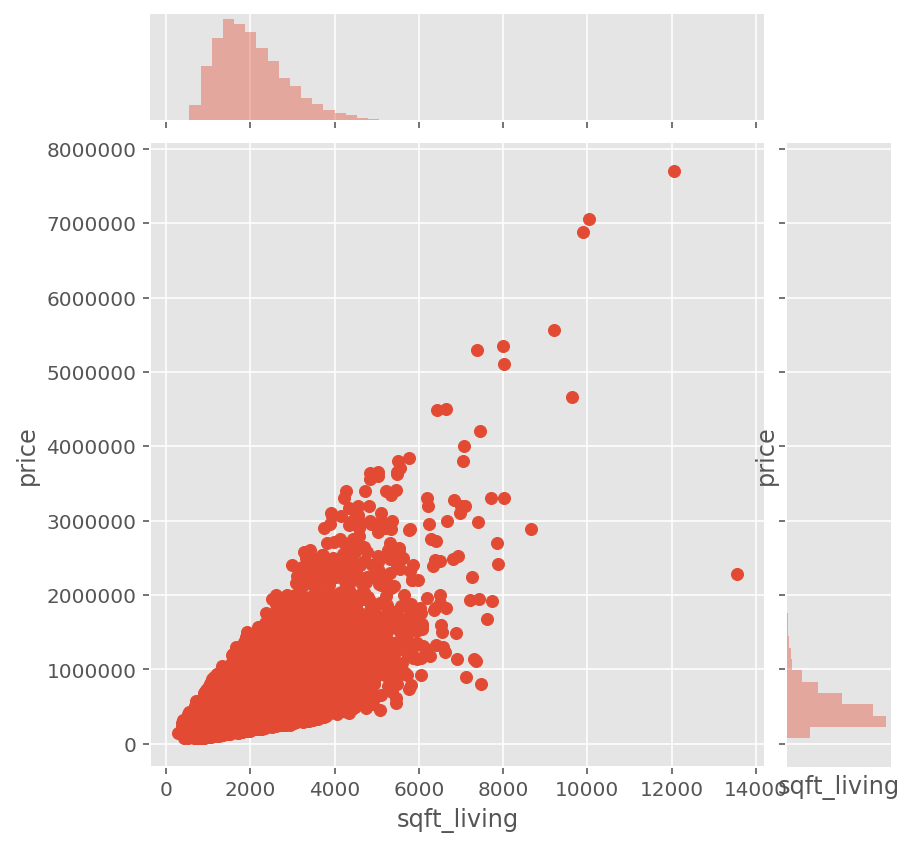

In [112]:
#price vs. sqft_living

plt.figure(figsize=(6,6))

sns.jointplot(x='sqft_living', y='price', data=df)
plt.xlabel('sqft_living')
plt.ylabel('price');

#### Quantitative vs. Qualitative

<Figure size 1152x432 with 0 Axes>

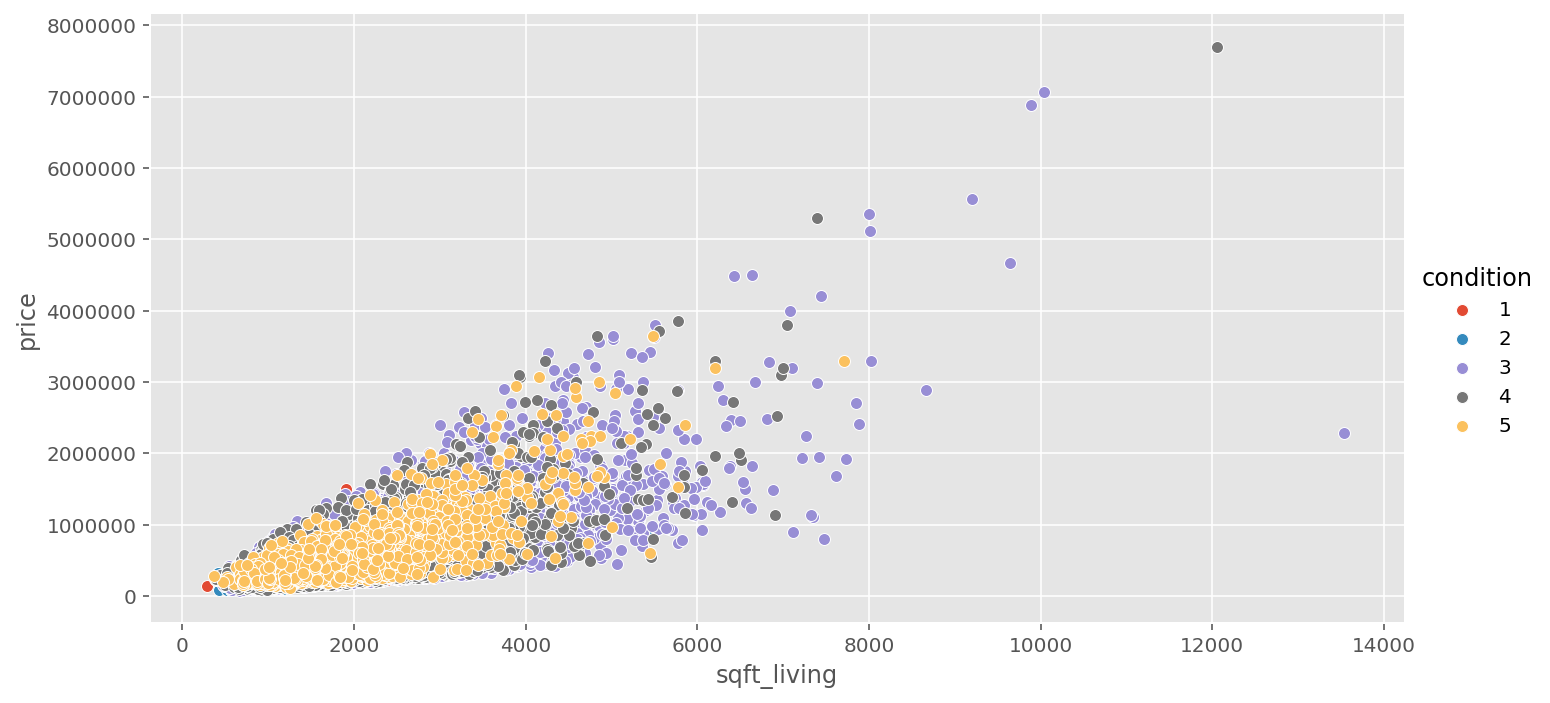

In [113]:
#price vs. sqft_living based on the house condition

plt.figure(figsize=(16,6))
g = sns.FacetGrid(df, hue='condition', size=5, aspect=2)
g = (g.map(plt.scatter, 'sqft_living', 'price', edgecolor='w').add_legend())

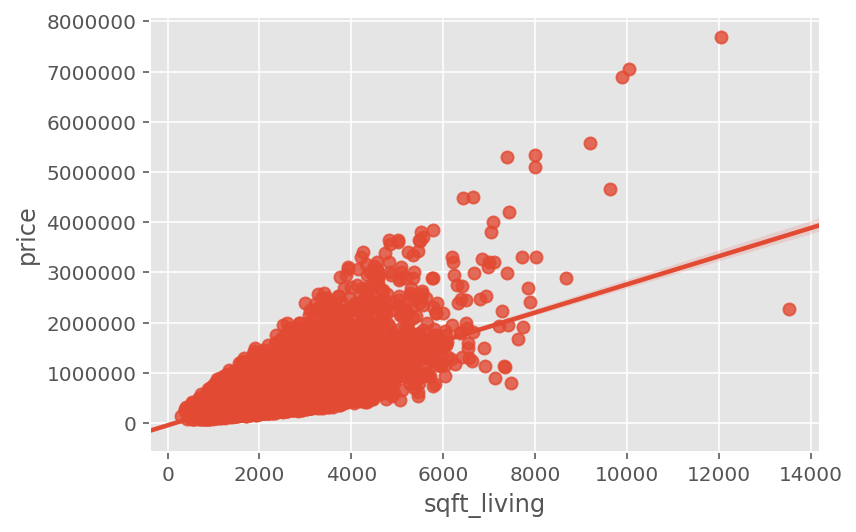

In [114]:
sns.regplot(x="sqft_living", y="price", data=df);

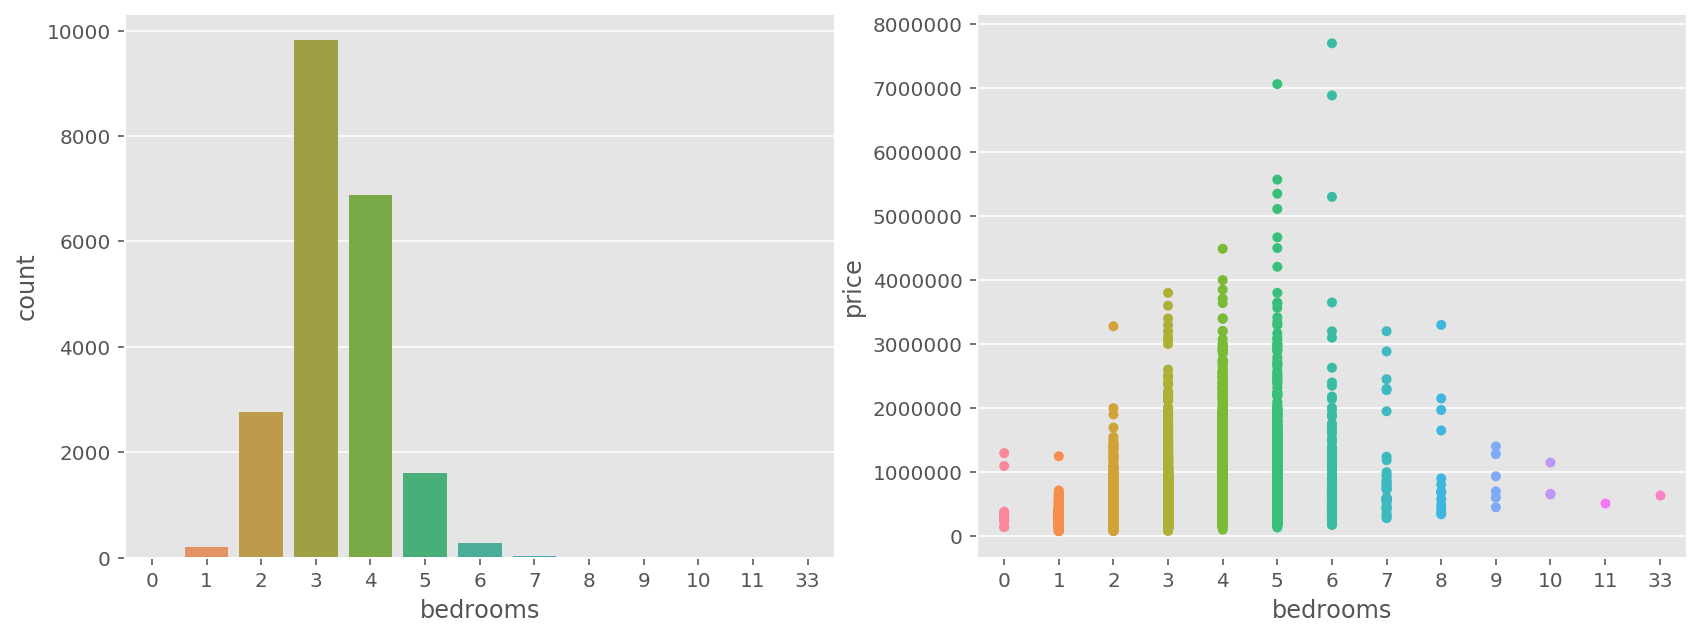

In [115]:
#bedrooms
fig, ax = plt.subplots(ncols=2, figsize=(14,5))

bedrooms = df['bedrooms'].value_counts()

sns.countplot(x='bedrooms', data=df, ax=ax[0])
sns.stripplot(x="bedrooms", y='price', data=df, jitter=False, ax=ax[1])


plt.show()

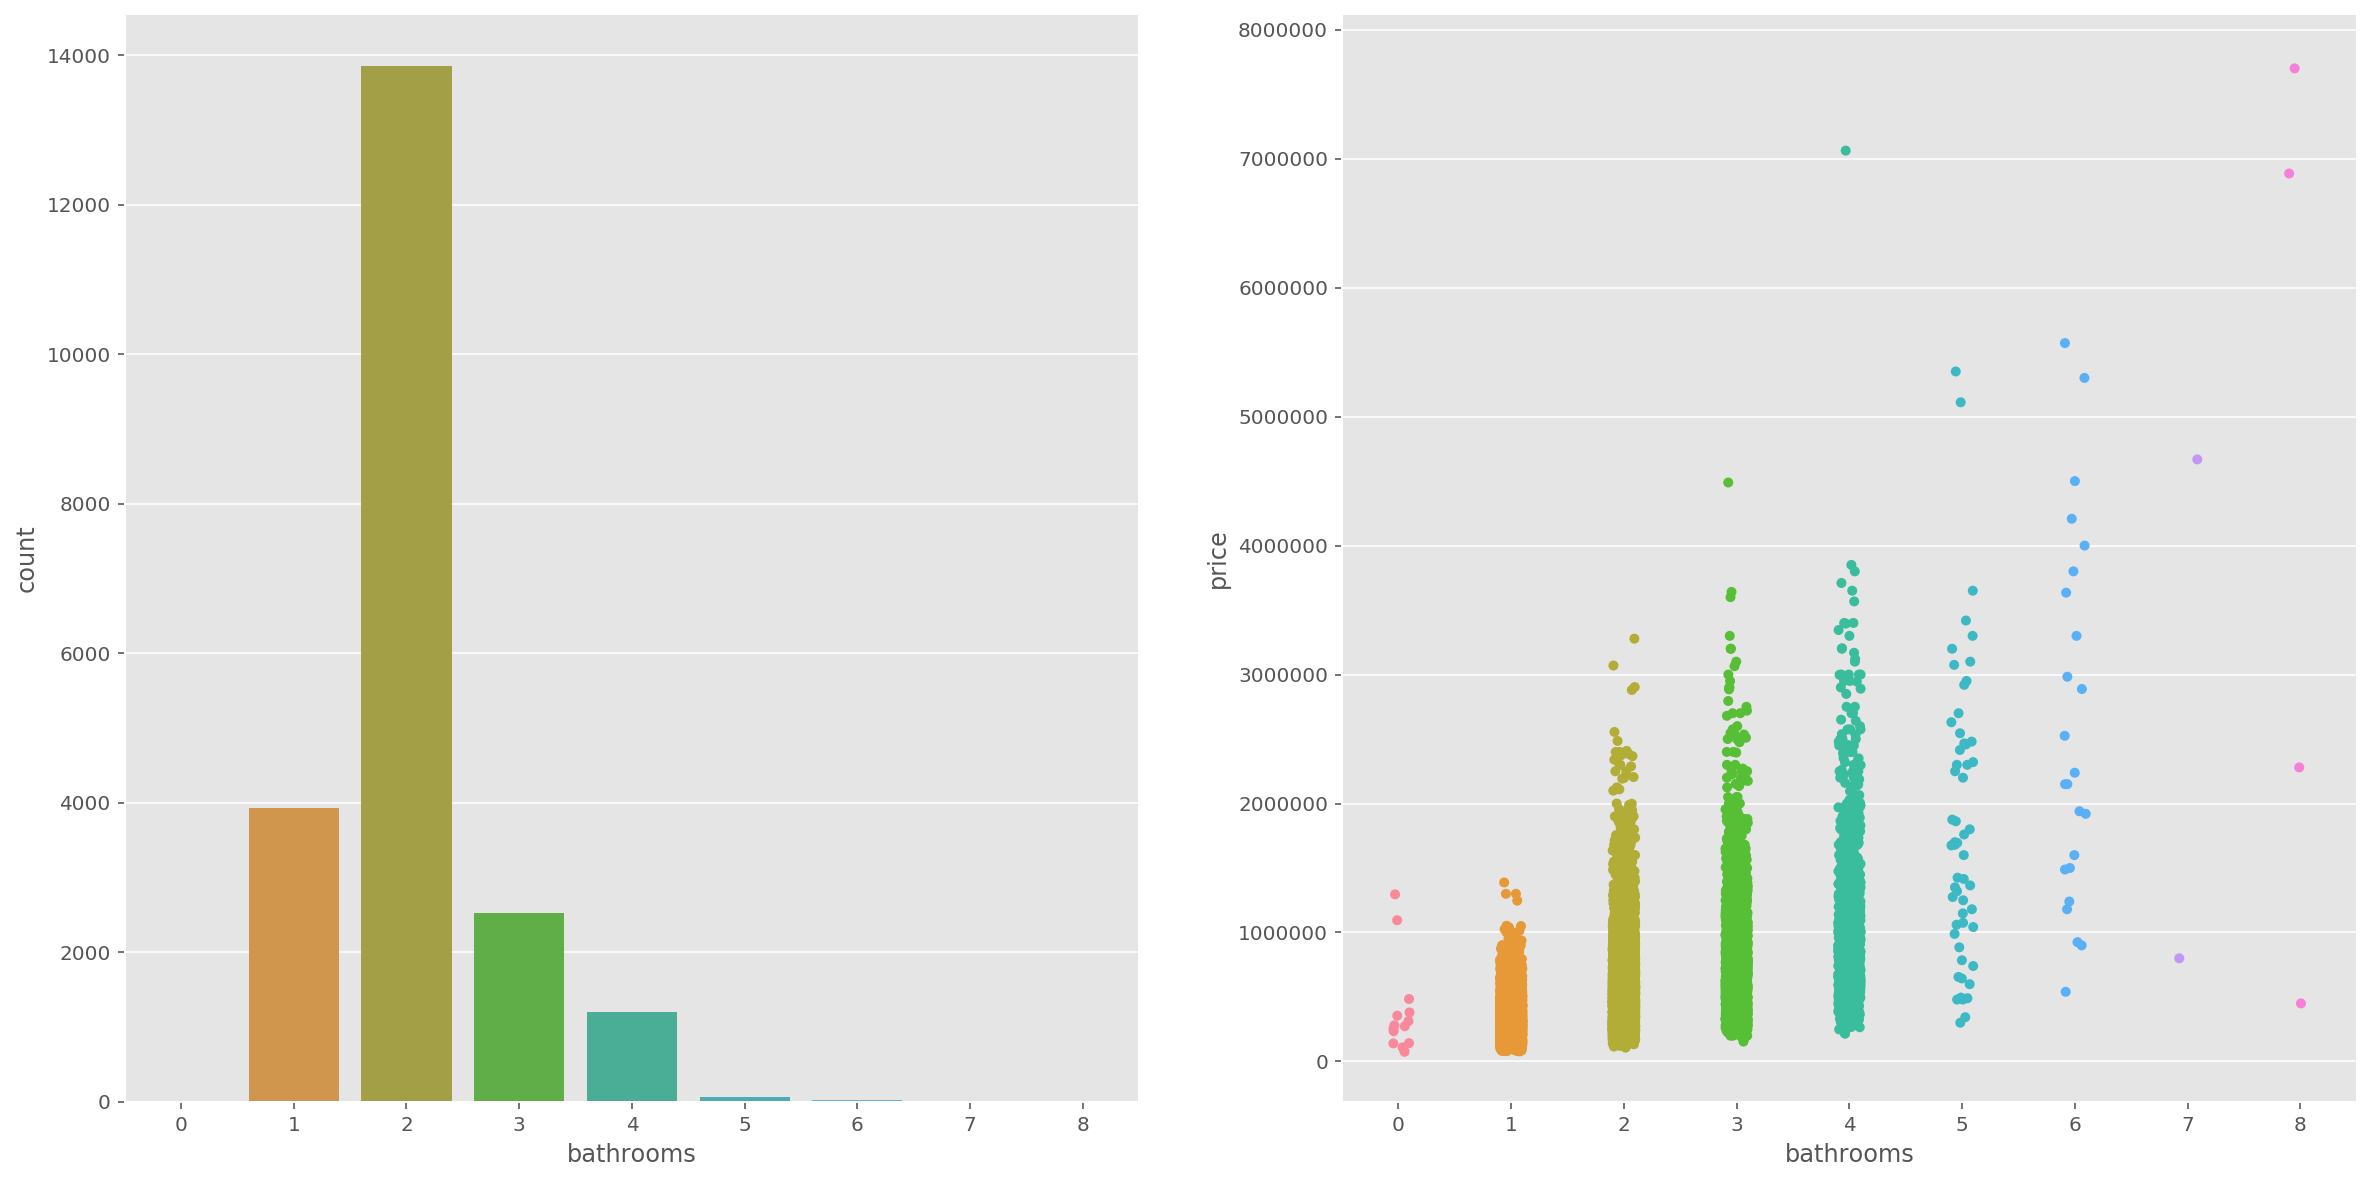

In [116]:
#bathrooms

fig, ax = plt.subplots(ncols=2, figsize=(20,10))

df['bathrooms'] = df['bathrooms'].round(0).astype(int)
bathrooms = df['bathrooms'].value_counts() 

sns.countplot(x='bathrooms', data=df, ax=ax[0])
sns.stripplot(x='bathrooms', y='price', data=df, ax=ax[1])

plt.show()


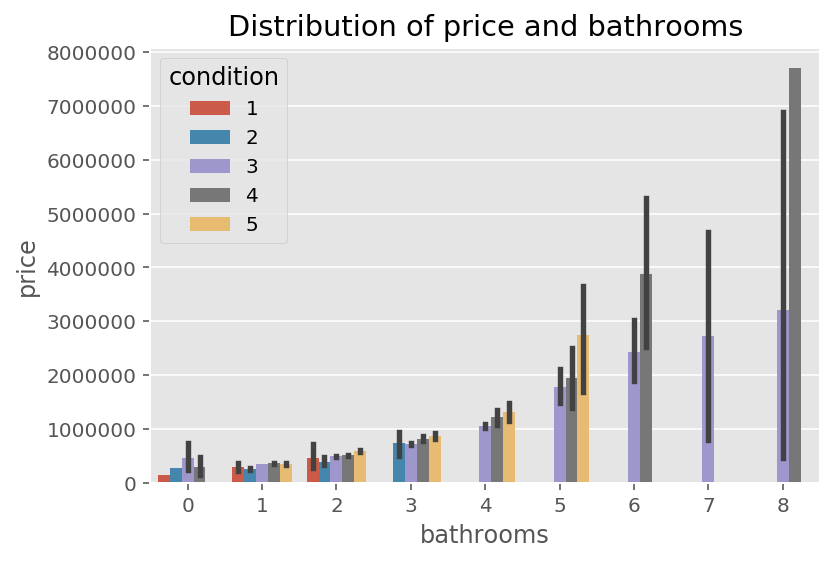

In [117]:
#Distribution of price and bathrooms based on the condition

sns.barplot(x='bathrooms', y='price', hue='condition', data=df)
plt.title('Distribution of price and bathrooms');

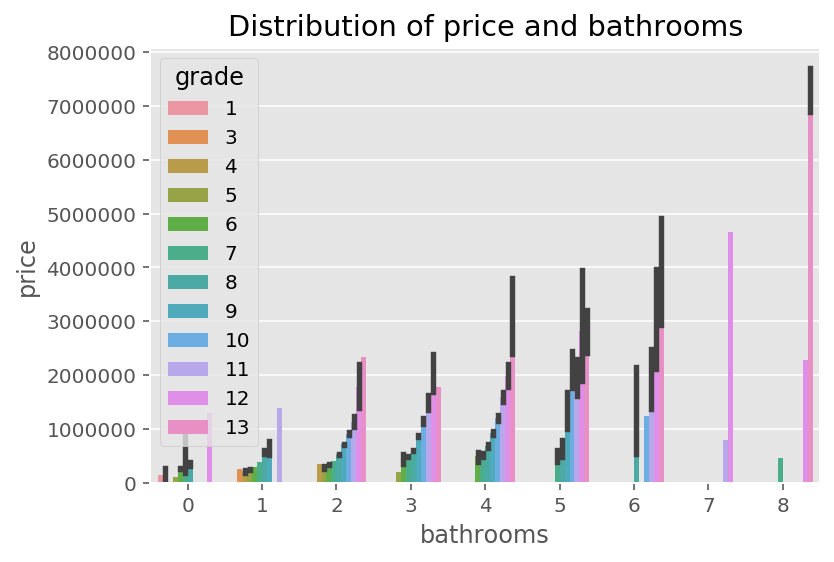

In [118]:
#Distribution of price and bathrooms based on the grade

sns.barplot(x='bathrooms', y='price', hue='grade', data=df)
plt.title('Distribution of price and bathrooms');

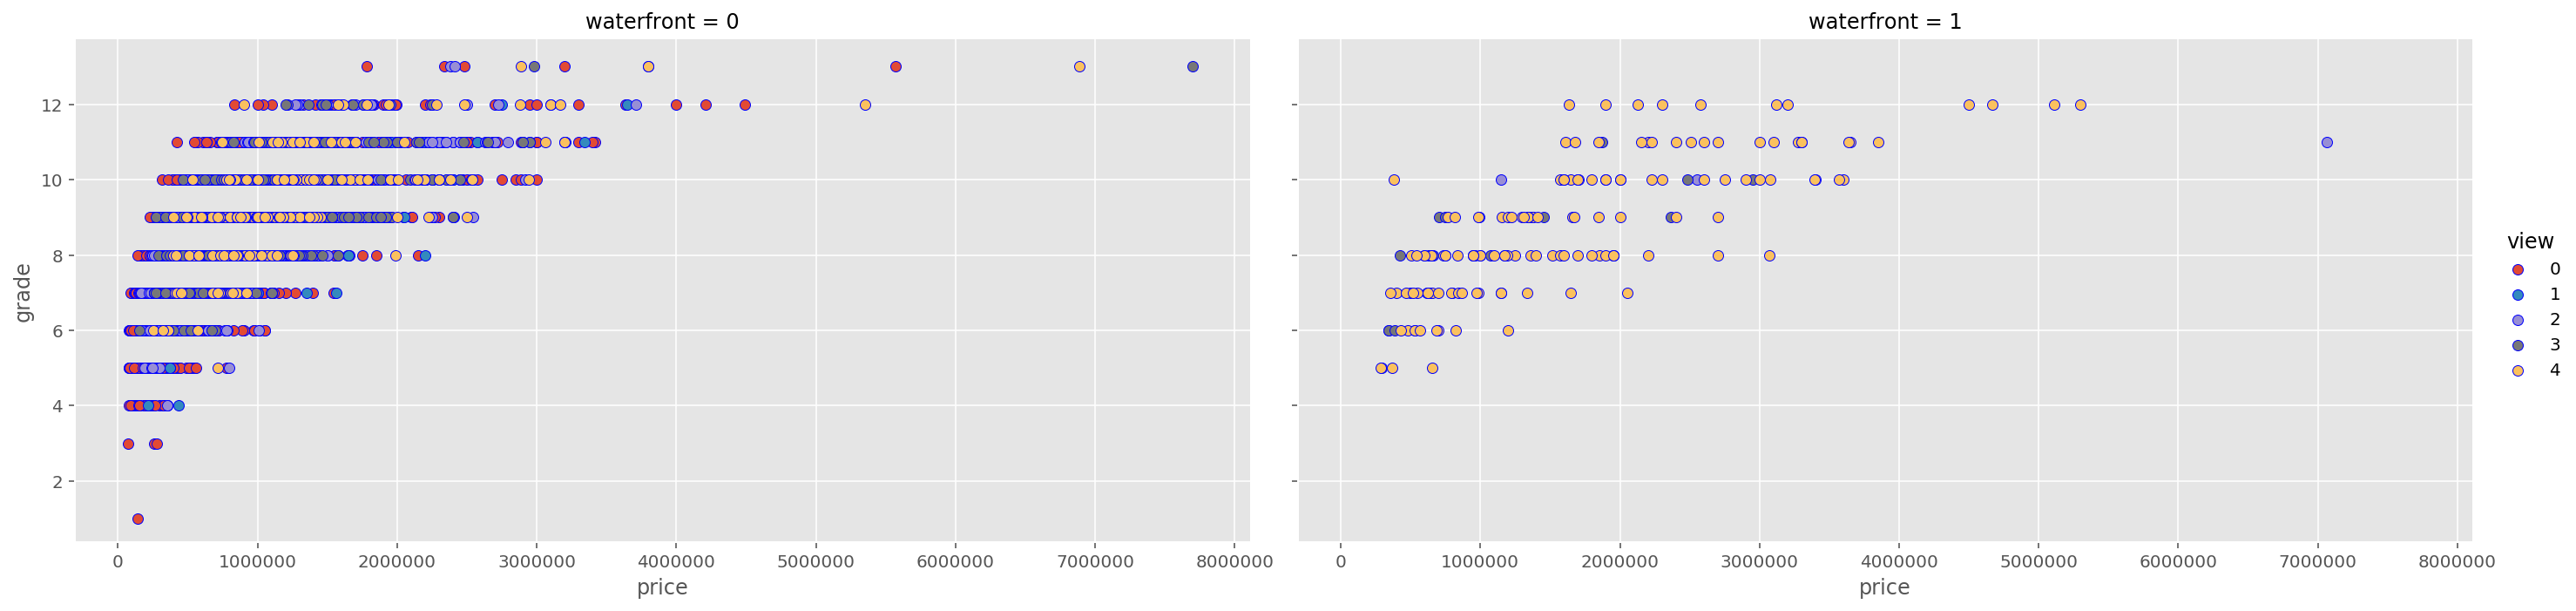

In [119]:
g = sns.FacetGrid(df, col='waterfront', hue='view', size=5, aspect=2)
g = (g.map(plt.scatter, 'price', 'grade', edgecolor='b').add_legend())

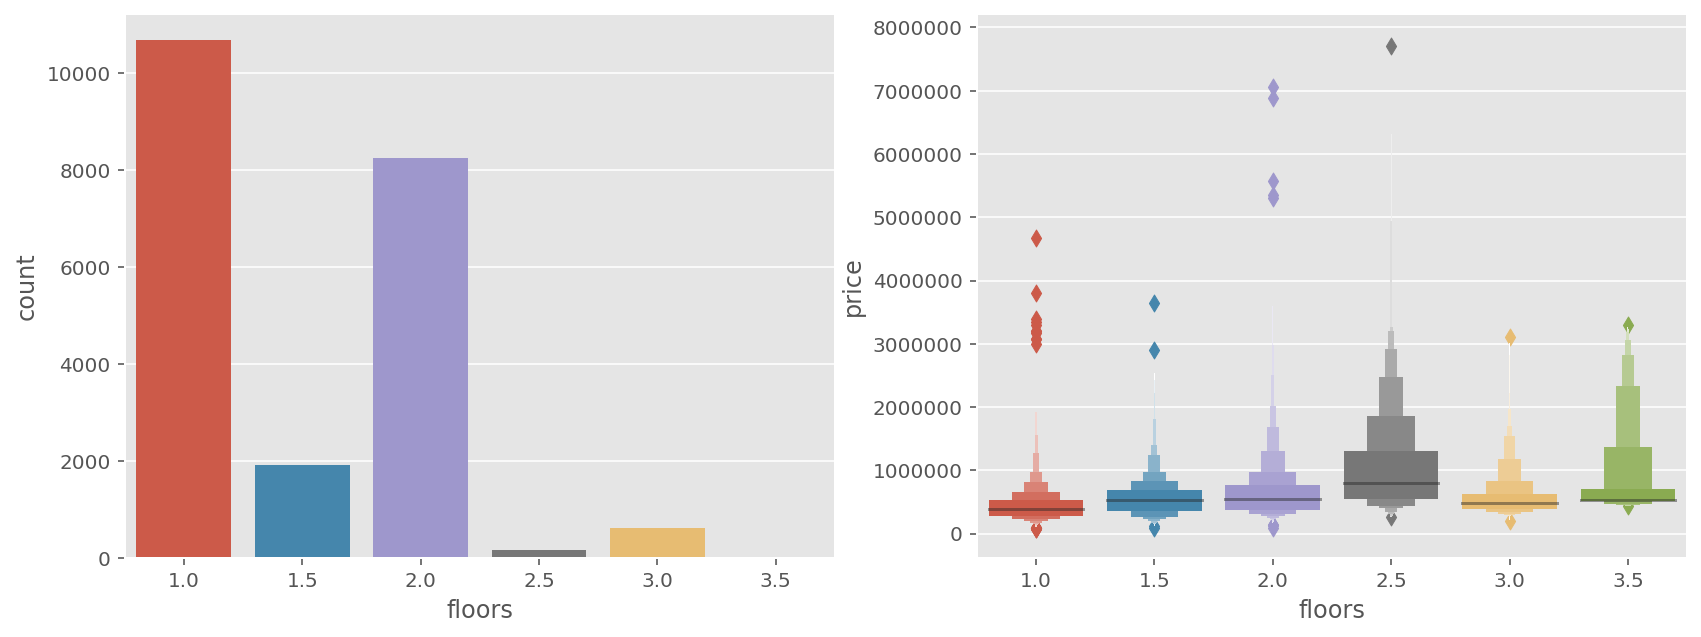

In [120]:
# price vs. floors
fig, ax = plt.subplots(ncols=2, figsize=(14,5))

sns.countplot(x="floors", data=df, ax=ax[0])
sns.boxenplot(x='floors', y='price', data=df, ax=ax[1]);

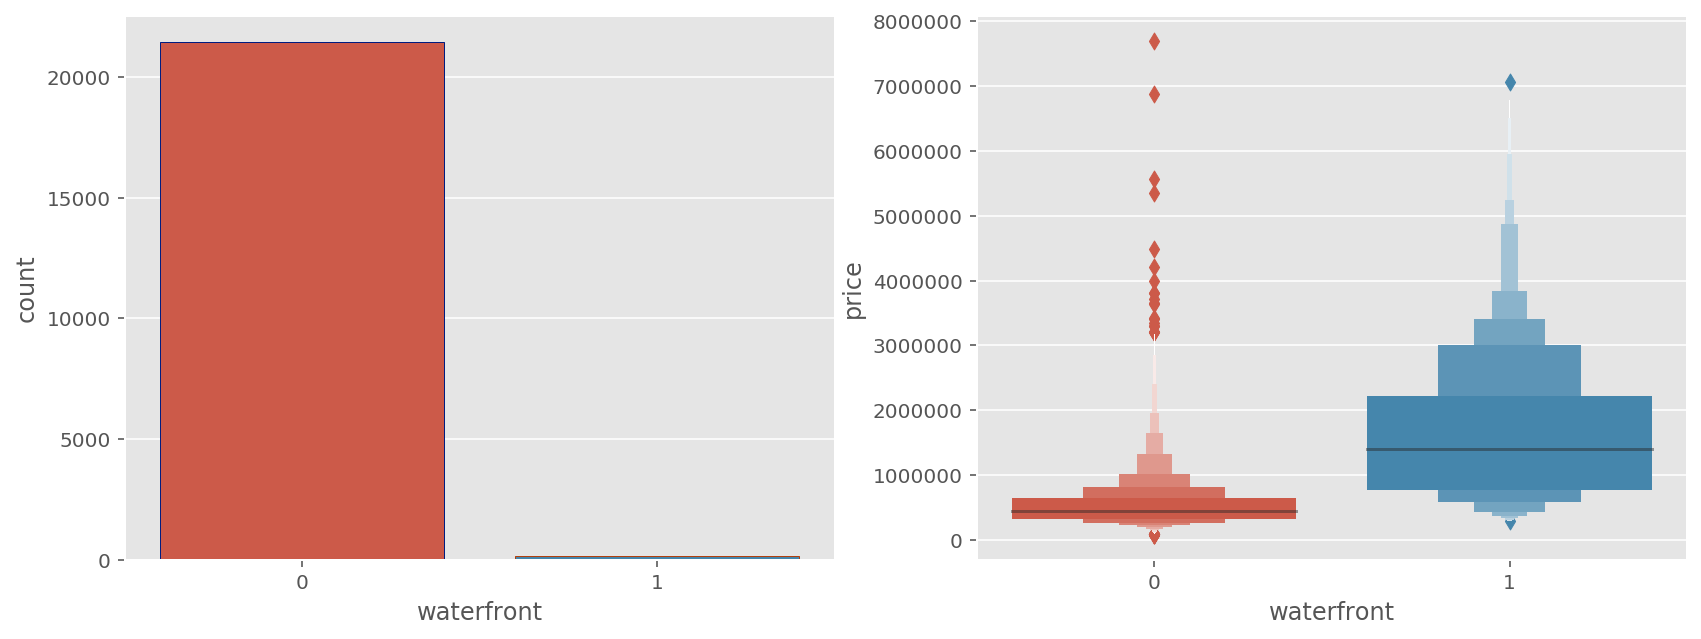

In [121]:
#price vs. waterfront
fig, ax = plt.subplots(ncols=2, figsize=(14,5))

sns.countplot(x="waterfront", data=df, edgecolor=sns.color_palette("dark", 3), ax=ax[0])
sns.boxenplot(x='waterfront', y='price', data=df, ax=ax[1]);

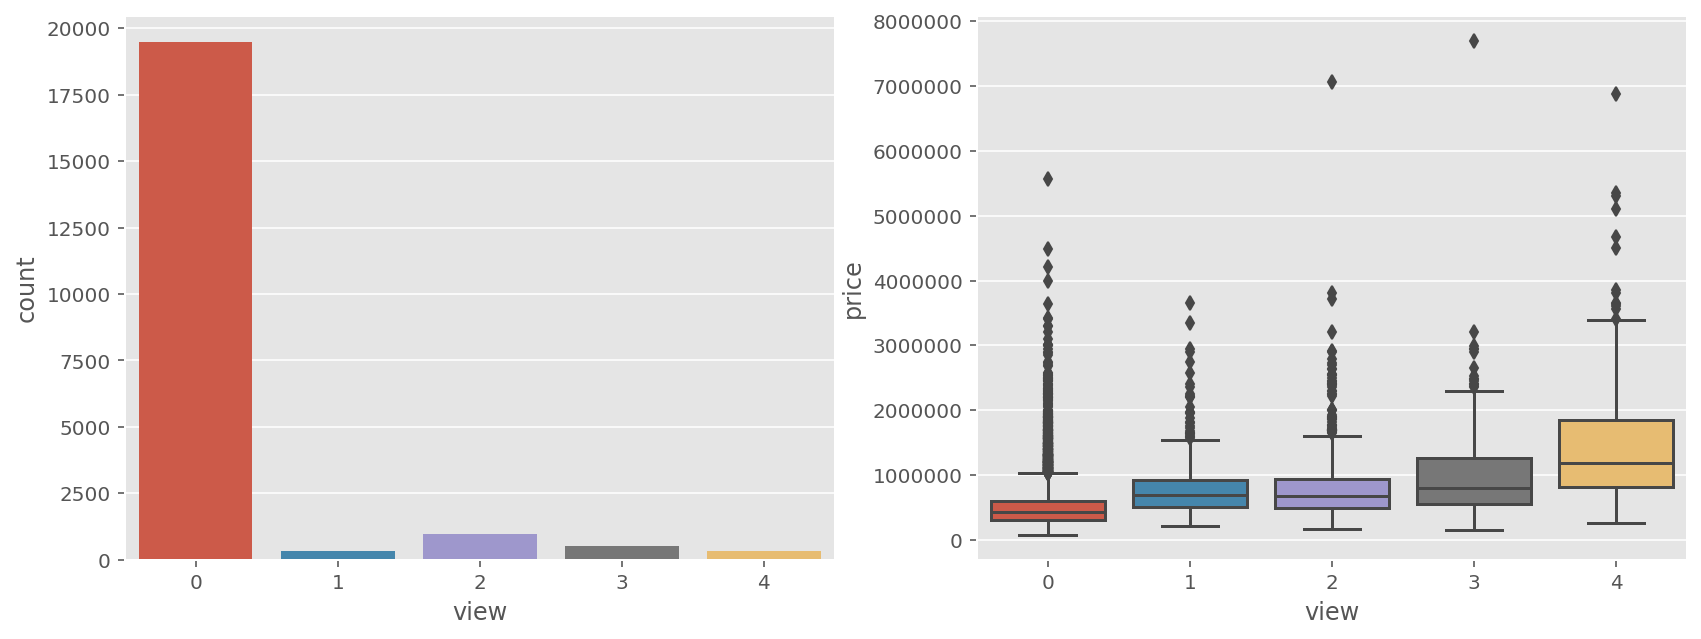

In [122]:
#price vs. view
fig, ax = plt.subplots(ncols=2, figsize=(14,5))

sns.countplot(x="view", data=df, ax=ax[0])
sns.boxplot(x='view', y='price', data=df, ax=ax[1]);

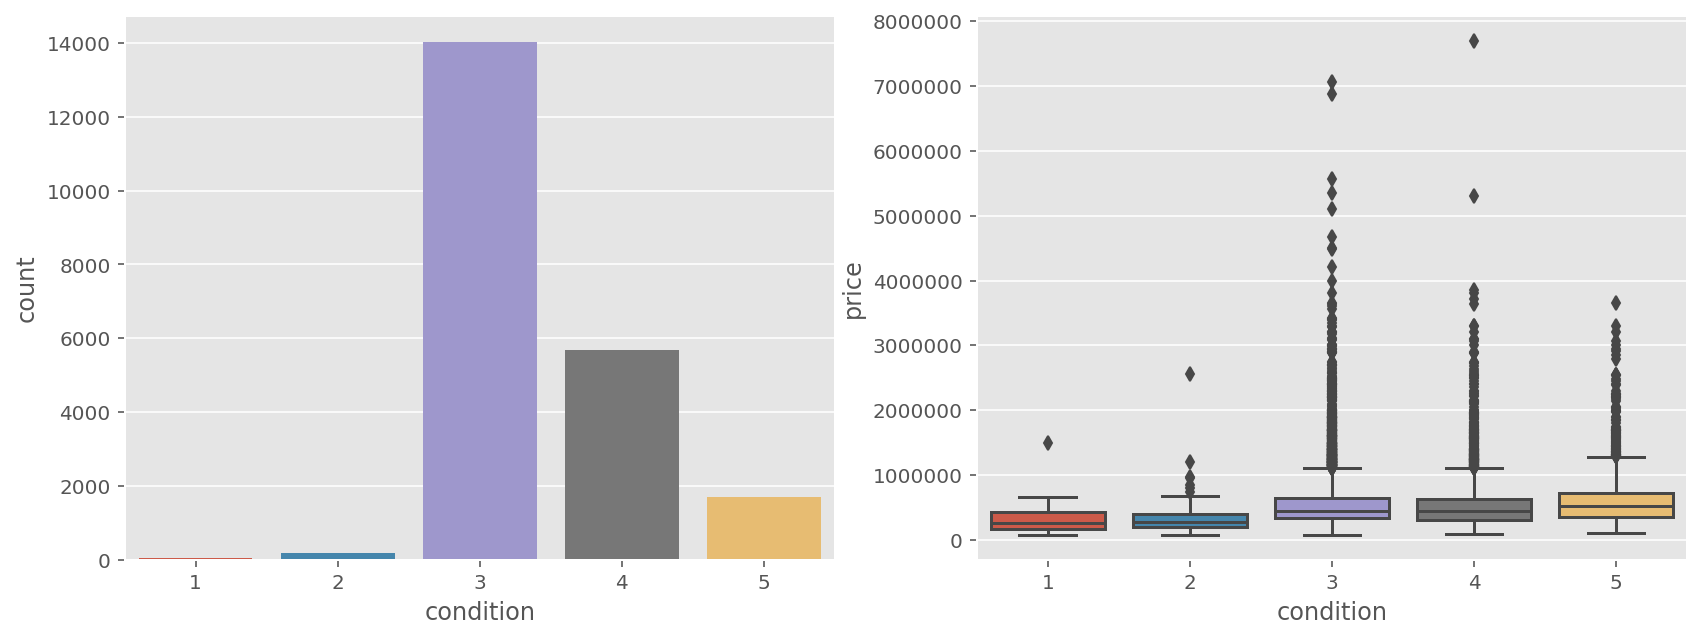

In [123]:
#price vs. condition
fig, ax = plt.subplots(ncols=2, figsize=(14,5))

sns.countplot(x="condition", data=df, ax=ax[0])
sns.boxplot(x='condition', y='price', data=df, ax=ax[1]);

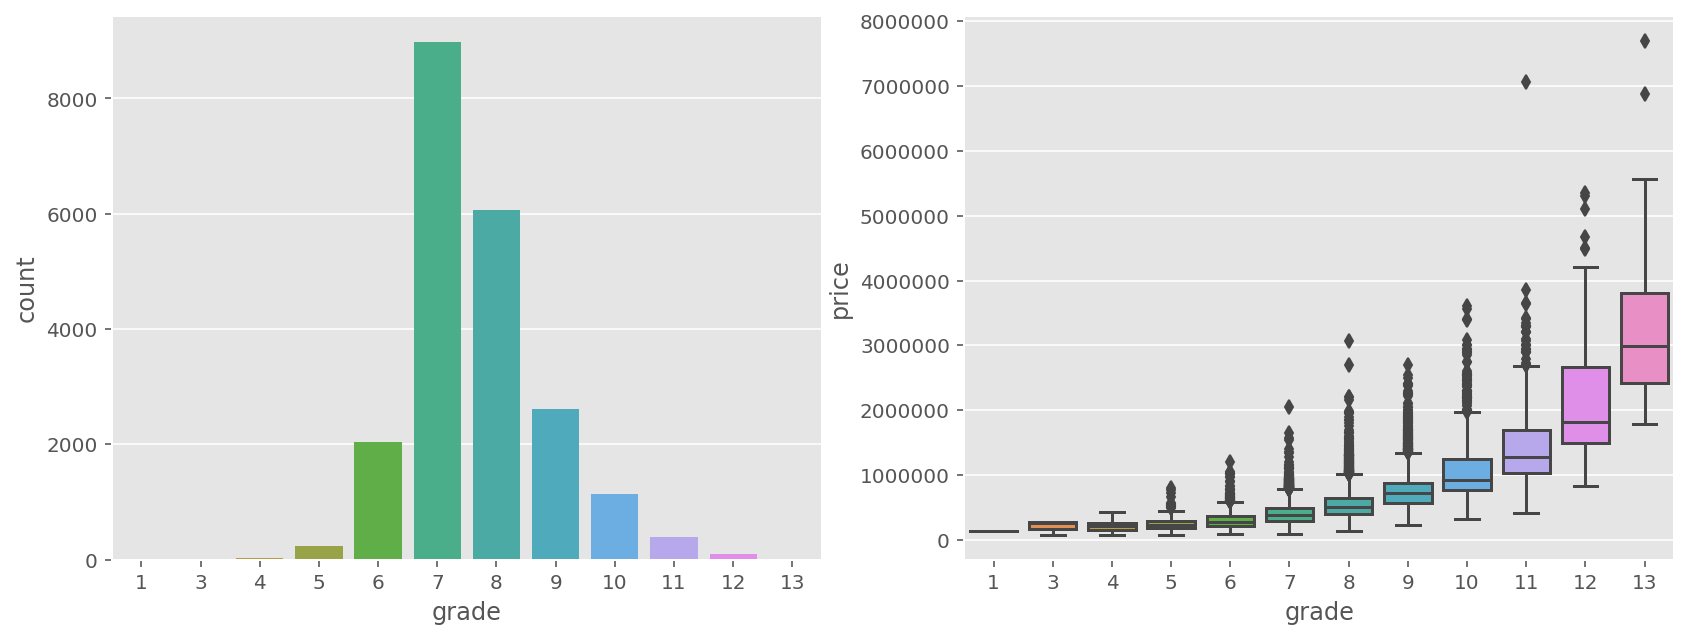

In [124]:
#price vs. grade
fig, ax = plt.subplots(ncols=2, figsize=(14,5))

sns.countplot(x="grade", data=df, ax=ax[0])
sns.boxplot(x='grade', y='price', data=df, ax=ax[1]);

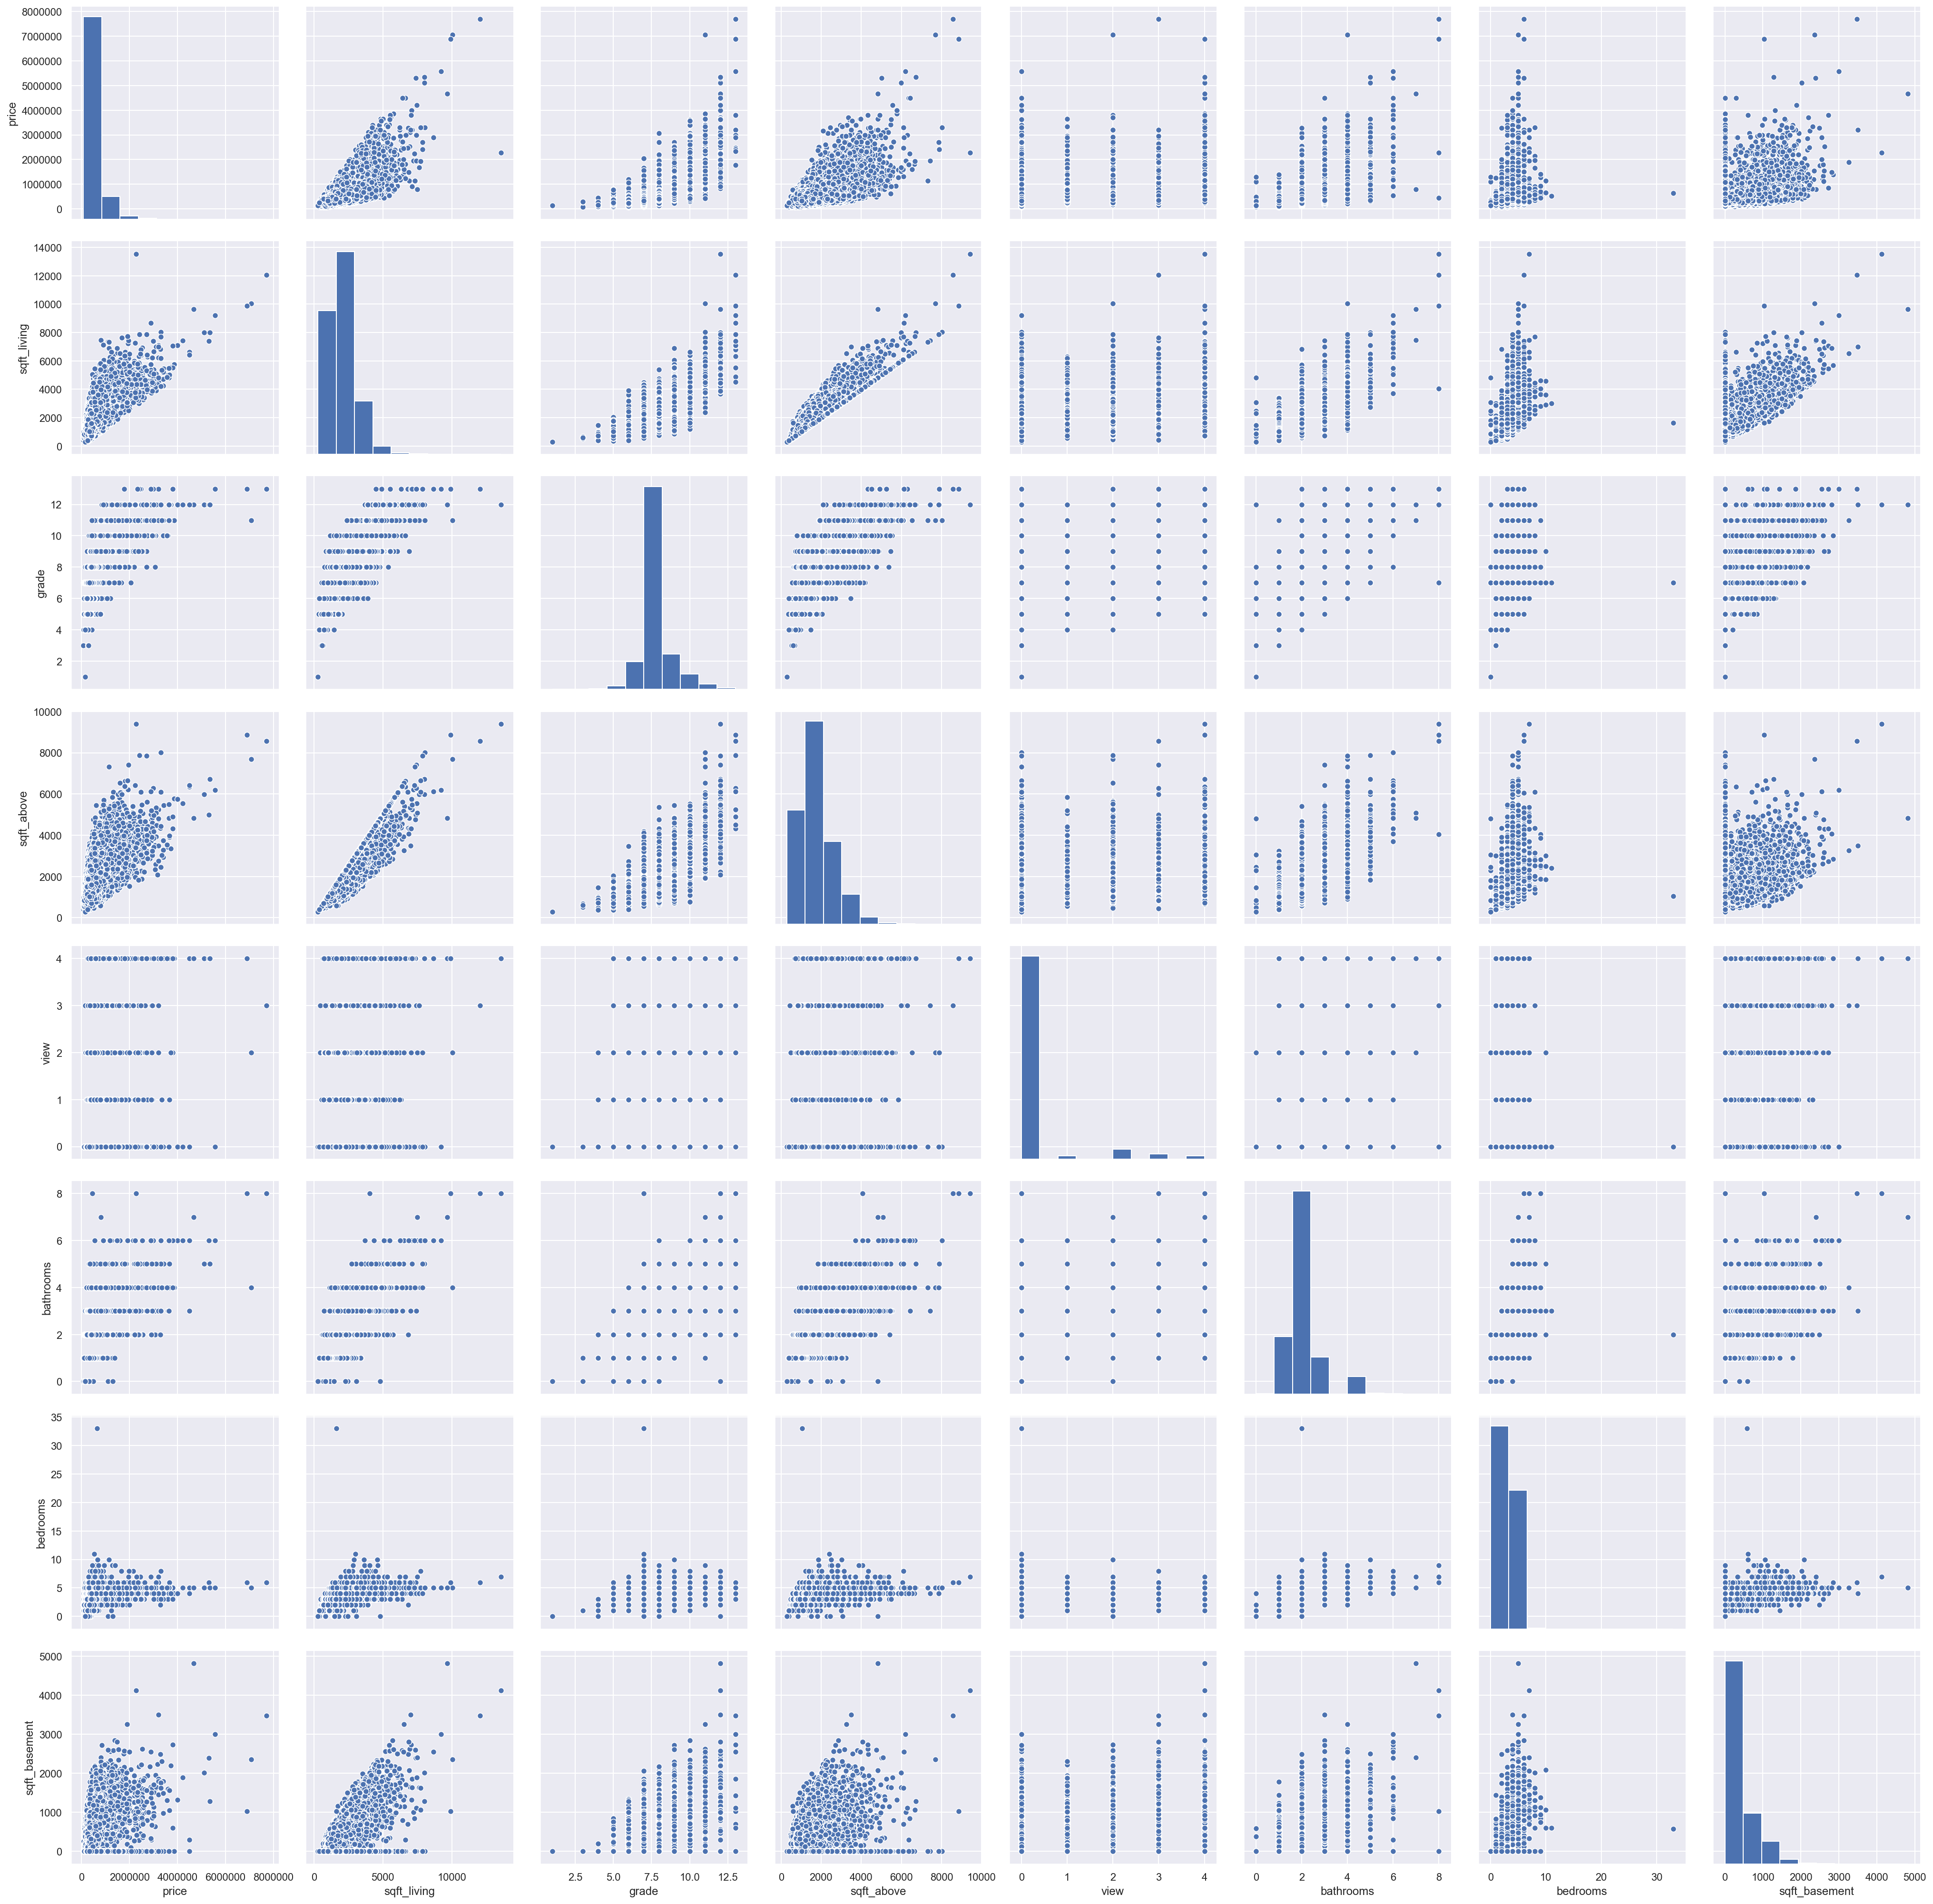

In [160]:
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms','bedrooms','sqft_basement']
sns.pairplot(df[cols], height = 3.5)
plt.show();

In [125]:
# Visualizing the correlation between bathrooms and bedrooms using crosstab

cm = sns.light_palette('blue', as_cmap=True)
pd.crosstab(df['bathrooms'], df['bedrooms']).style.background_gradient(cmap=cm)

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
bathrooms,,,,,,,,,,,,,
0,7,4,2,0,1,0,0,0,0,0,0,0,0
1,2,167,1587,1800,327,43,6,1,0,0,0,0,0
2,4,28,1129,7186,4709,695,90,7,1,0,1,0,1
3,0,0,41,656,1219,506,88,7,6,2,1,1,0
4,0,0,1,182,601,321,72,17,4,3,0,0,0
5,0,0,0,0,19,22,12,2,1,0,1,0,0
6,0,0,0,0,6,13,2,2,1,0,0,0,0
7,0,0,0,0,0,1,0,1,0,0,0,0,0
8,0,0,0,0,0,0,2,1,0,1,0,0,0


In [126]:
cm = sns.light_palette('green', as_cmap=True)
pd.crosstab(df['bathrooms'], df['condition']).style.background_gradient(cmap=cm)

condition,1,2,3,4,5
bathrooms,,,,,
0,1,1,9,3,0
1,20,91,2211,1300,311
2,9,75,9000,3702,1065
3,0,5,1713,553,256
4,0,0,1026,109,66
5,0,0,46,8,3
6,0,0,21,3,0
7,0,0,2,0,0
8,0,0,3,1,0


In [127]:
cm = sns.light_palette('red', as_cmap=True)
pd.crosstab(df['bedrooms'], df['condition']).style.background_gradient(cmap=cm)

condition,1,2,3,4,5
bedrooms,,,,,
0,1,1,10,1,0
1,4,11,124,48,12
2,12,51,1779,718,200
3,8,69,6308,2711,728
4,4,36,4580,1682,580
5,0,1,1031,418,151
6,1,3,158,87,23
7,0,0,25,9,4
8,0,0,8,3,2


In [128]:
cm = sns.light_palette('black', as_cmap=True)
pd.crosstab(df['condition'], df['grade']).style.background_gradient(cmap=cm)

grade,1,3,4,5,6,7,8,9,10,11,12,13
condition,,,,,,,,,,,,
1,1,0,1,9,11,6,2,0,0,0,0,0
2,0,1,5,15,59,75,13,2,2,0,0,0
3,0,1,13,100,1035,5234,4269,2041,921,332,74,11
4,0,0,10,84,685,2833,1394,446,156,56,13,2
5,0,1,0,34,248,833,390,126,55,11,3,0


#### Correlation Matrix

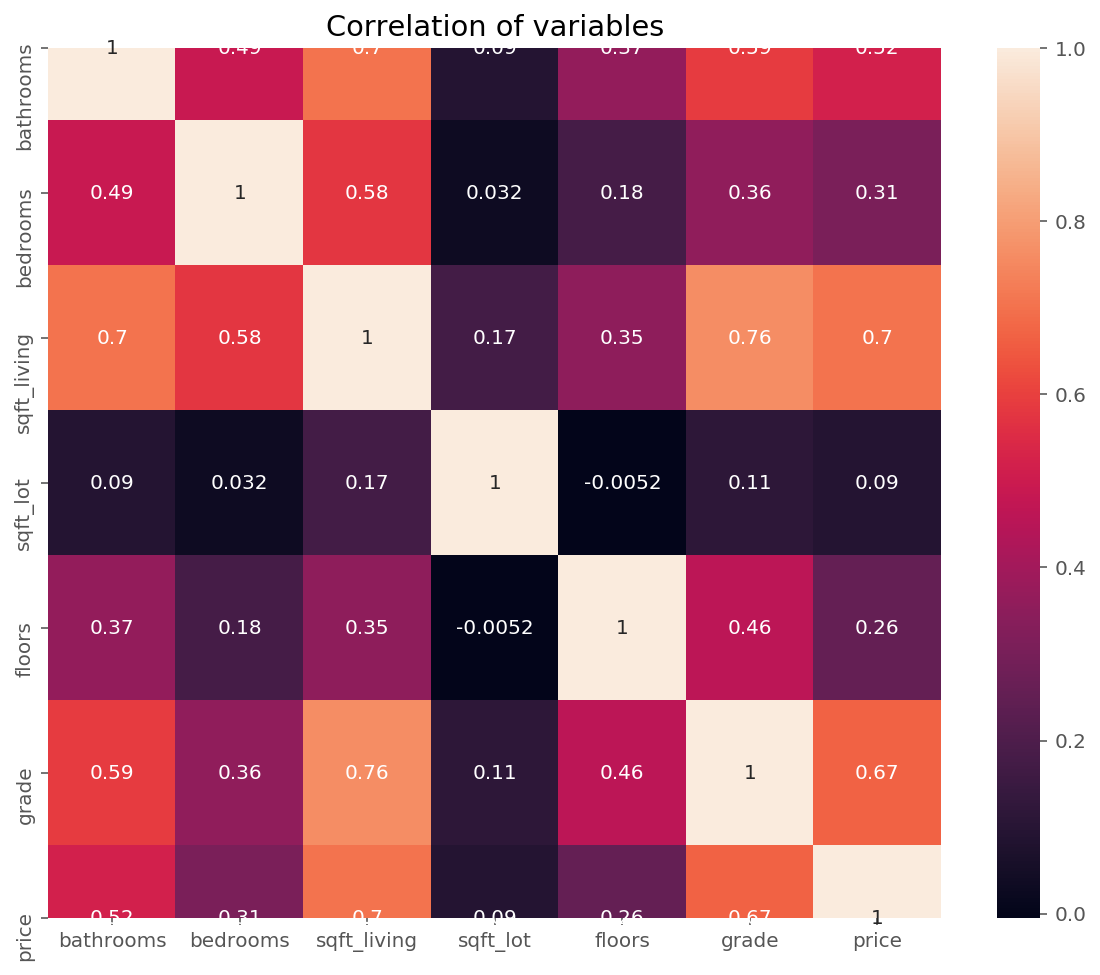

In [129]:
corr = df[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

### 5. Model developement (Predicting house price)

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

### A. Simple LinearRegression

In [133]:


lr = linear_model.LinearRegression()
new_df = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view',
               'sqft_basement','lat','waterfront','yr_built','bedrooms']]

In [134]:
X = new_df.values
y = df['price'].values

In [138]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [139]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
print(lr.predict(X_val))

[ 438442.2923  730635.8306 1201420.0688 ...  358118.9481  602585.849
  375098.6647]


In [141]:
lr.score(X_val, y_val)

0.6916298892308053

### B. XGBREgressor

In [150]:
df.drop(['id', 'date'], axis=1, inplace=True)
X = df.drop("price",axis=1).values
y = df["price"].values

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [152]:
thresh = 5 * 10**(-3)
model = XGBRegressor()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
select_X_val = selection.transform(X_test)
# test 
select_X_test = selection.transform(X_test)

In [153]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [154]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=0.75)

In [155]:
y_hat = xgb.predict(X_test)

In [156]:
xgb.score(X_test,y_test)

0.8979147172715796

### 6. References

[Dataset](https://www.kaggle.com/harlfoxem/housesalesprediction)<br>
[predicting-house-prices](https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices)<br>